In [27]:
# import dependencies
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests


In [28]:
#Creates reference to past CSV file
pastcsv = os.path.join("..", "CSV_Input", "NEO_1900-2020.csv")

#Imports CSV into a pandas Dataframe and drops any rows with null values
past_neo_df = pd.read_csv(pastcsv)
past_neo_df.head()

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Estimated Diameter,Unnamed: 8
0,252P/LINEAR,2016-Mar-21 13:16 ± < 00:01,13.87 | 0.03563,13.87 | 0.03563,10.56,10.55,NaN,NaN,c00252_0
1,7P/Pons-Winnecke,1927-Jun-26 19:36 ± < 00:01,15.33 | 0.03938,15.32 | 0.03938,13.91,13.90,NaN,NaN,c00007_0
2,322P/SOHO,1947-Apr-11 04:00 ± 02:19,18.46 | 0.04744,18.07 | 0.04643,40.46,40.46,NaN,NaN,c00322_0
3,289P/Blanpain,1919-Dec-09 03:20 ± 17:45,18.37 | 0.04720,18.37 | 0.04720,11.41,11.41,NaN,NaN,c00289_0
4,P/1999 J6 (SOHO),1999-Jun-12 05:23 ± 00:27,4.70 | 0.01206,3.74 | 0.00960,42.92,42.91,NaN,NaN,dJ99J060


In [29]:
#past_neo_df = past_neo_df[["Object", "Close-Approach (CA) Date", "CA Distance Nominal (LD | au)", "CA Distance Minimum (LD | au)", "Estimated Diameter"]]
past_neo_df = past_neo_df[["Object", "Close-Approach (CA) Date", "CA Distance Nominal (LD | au)", "Estimated Diameter"]]
past_neo_df.set_index('Object', inplace=True)
past_neo_df.head()



,Close-Approach (CA) Date,CA Distance Nominal (LD | au),Estimated Diameter
Object,,,
252P/LINEAR,2016-Mar-21 13:16 ± < 00:01,13.87 | 0.03563,NaN
7P/Pons-Winnecke,1927-Jun-26 19:36 ± < 00:01,15.33 | 0.03938,NaN
322P/SOHO,1947-Apr-11 04:00 ± 02:19,18.46 | 0.04744,NaN
289P/Blanpain,1919-Dec-09 03:20 ± 17:45,18.37 | 0.04720,NaN
P/1999 J6 (SOHO),1999-Jun-12 05:23 ± 00:27,4.70 | 0.01206,NaN


In [30]:
past_neo_df.dropna(inplace = True)
past_neo_df

,Close-Approach (CA) Date,CA Distance Nominal (LD | au),Estimated Diameter
Object,,,
161989 Cacus (1978 CA),1997-Sep-01 23:45 ± < 00:01,12.09 | 0.03107,970 m - 2.2 km
5604 (1992 FE),2017-Feb-24 10:03 ± < 00:01,13.07 | 0.03360,970 m - 2.2 km
5604 (1992 FE),1992-Feb-25 09:34 ± < 00:01,13.77 | 0.03537,970 m - 2.2 km
285263 (1998 QE2),2013-May-31 20:59 ± < 00:01,15.25 | 0.03917,970 m - 2.2 km
153311 (2001 MG1),1989-Aug-17 05:38 ± < 00:01,15.26 | 0.03922,970 m - 2.2 km
...,...,...,...
4450 Pan (1987 SY),1916-Aug-31 06:43 ± < 00:01,16.35 | 0.04200,1.0 km - 2.3 km
85989 (1999 JD6),2015-Jul-25 04:55 ± < 00:01,18.84 | 0.04842,1.0 km - 2.3 km
(2019 AS5),2019-Jan-08 00:37 ± < 00:01,0.04 | 0.00010,0.92 m - 2.1 m


In [31]:
#Keeps only Lunar Distance (LD) portion of CA Distance Nominal column
nomdistld = past_neo_df["CA Distance Nominal (LD | au)"].str.split(" | ", n = 1, expand = True)
nomdistld = past_neo_df["CA Distance Nominal (LD | au)"].str.split(" | ", n = 1, expand = True)
past_neo_df["CA Distance Nominal (LD)"] = nomdistld[0]

#Keeps only Lunar Distance (LD) portion of CA Distance Minimum column
#mindistld = neo_past_df["CA Distance Minimum (LD | au)"].str.split(" | ", n = 1, expand = True)
#neo_past_df["CA Distance Minimum (LD)"] = mindistld[0]

#Converts Lunar Distance to kilometers and updates column in DataFrame
#neo_past_df["CA Distance Nominal (km)"] = neo_past_df["CA Distance Nominal (LD)"].astype(float) * (384402)
#neo_past_df["CA Distance Minimum (km)"] = neo_past_df["CA Distance Minimum (LD)"].astype(float) * (384402)
#neo_past_df = neo_past_df[["Close-Approach (CA) Date", "CA Distance Nominal (km)", "CA Distance Minimum (km)", "Estimated Diameter"]]
#neo_past_df

In [32]:
#Keeps only Lunar Distance (LD) portion of CA Distance Minimum column
#mindistld = neo_past_df["CA Distance Minimum (LD | au)"].str.split(" | ", n = 1, expand = True)
#neo_past_df["CA Distance Minimum (LD)"] = mindistld[0]



#Converts Lunar Distance to kilometers and updates column in DataFrame
past_neo_df["CA Distance Nominal (km)"] = past_neo_df["CA Distance Nominal (LD)"].astype(float) * (384402)
past_neo_df = past_neo_df[["Close-Approach (CA) Date", "CA Distance Nominal (km)", "Estimated Diameter"]]
past_neo_df

,Close-Approach (CA) Date,CA Distance Nominal (km),Estimated Diameter
Object,,,
161989 Cacus (1978 CA),1997-Sep-01 23:45 ± < 00:01,4647420.18,970 m - 2.2 km
5604 (1992 FE),2017-Feb-24 10:03 ± < 00:01,5024134.14,970 m - 2.2 km
5604 (1992 FE),1992-Feb-25 09:34 ± < 00:01,5293215.54,970 m - 2.2 km
285263 (1998 QE2),2013-May-31 20:59 ± < 00:01,5862130.50,970 m - 2.2 km
153311 (2001 MG1),1989-Aug-17 05:38 ± < 00:01,5865974.52,970 m - 2.2 km
...,...,...,...
4450 Pan (1987 SY),1916-Aug-31 06:43 ± < 00:01,6284972.70,1.0 km - 2.3 km
85989 (1999 JD6),2015-Jul-25 04:55 ± < 00:01,7242133.68,1.0 km - 2.3 km
(2019 AS5),2019-Jan-08 00:37 ± < 00:01,15376.08,0.92 m - 2.1 m


In [33]:
#Seperates min and max diameter of each NEO and converts all of their respective sizes into kilometers
def mindiameter(rawdiameter):
    diam = rawdiameter.split(" ")
    if diam[1] == "km":
        return float(diam[0])
    else:
        return float(diam[0])/1000
def maxdiameter(rawdiameter):
    diam = rawdiameter.split(" ")
    if diam[-1] == "km":
        return float(diam[-2])
    else:
        return float(diam[-2])/1000
    
#Adds their Min/Max diameters in kms to two new columns
past_neo_df.loc[:,"Min Diameter (km)"] = past_neo_df.loc[:,"Estimated Diameter"].apply(mindiameter)
past_neo_df.loc[:,"Max Diameter (km)"] = past_neo_df.loc[:,"Estimated Diameter"].apply(maxdiameter)



C:\Users\kevin\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kevin\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
#Keeps only Objects with a CA Distance Nominal (km) less than a Lunar Distance from Earth (384402 km) 
past_neo_df = past_neo_df.loc[past_neo_df["CA Distance Nominal (km)"] < 384402]

past_neo_df


,Close-Approach (CA) Date,CA Distance Nominal (km),Estimated Diameter,Min Diameter (km),Max Diameter (km)
Object,,,,,
(2020 HX3),2020-Apr-24 19:38 ± < 00:01,253705.32,9.8 m - 22 m,0.00980,0.0220
(2017 FY101),1918-Mar-29 17:18 ± 3_06:58,238329.24,9.7 m - 22 m,0.00970,0.0220
(2019 AE9),2019-Jan-12 11:09 ± < 00:01,99944.52,9.7 m - 22 m,0.00970,0.0220
(2010 AL30),2010-Jan-13 12:47 ± < 00:01,130696.68,9.7 m - 22 m,0.00970,0.0220
(2018 FE3),2018-Mar-18 07:12 ± < 00:01,146072.76,9.7 m - 22 m,0.00970,0.0220
...,...,...,...,...,...
(2011 CQ1),2011-Feb-04 19:39 ± < 00:01,11532.06,1.0 m - 2.3 m,0.00100,0.0023
(2008 UM1),2008-Oct-22 03:57 ± 00:13,84568.44,1.0 m - 2.3 m,0.00100,0.0023
(2019 AS5),2019-Jan-08 00:37 ± < 00:01,15376.08,0.92 m - 2.1 m,0.00092,0.0021


In [35]:
past_neo_csv = past_neo_df.to_csv("../CSV_Output/Past_NEO_Data.csv", encoding="utf-8", index=True)

In [36]:
#Multiply by 1000 and convert ALL maximum diameters to meters to make easier to work with
past_neo_df["Max Diameter (m)"] = past_neo_df["Max Diameter (km)"] * 1000
past_neo_df

C:\Users\kevin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close-Approach (CA) Date,CA Distance Nominal (km),Estimated Diameter,Min Diameter (km),Max Diameter (km),Max Diameter (m)
Object,,,,,,
(2020 HX3),2020-Apr-24 19:38 ± < 00:01,253705.32,9.8 m - 22 m,0.00980,0.0220,22.0
(2017 FY101),1918-Mar-29 17:18 ± 3_06:58,238329.24,9.7 m - 22 m,0.00970,0.0220,22.0
(2019 AE9),2019-Jan-12 11:09 ± < 00:01,99944.52,9.7 m - 22 m,0.00970,0.0220,22.0
(2010 AL30),2010-Jan-13 12:47 ± < 00:01,130696.68,9.7 m - 22 m,0.00970,0.0220,22.0
(2018 FE3),2018-Mar-18 07:12 ± < 00:01,146072.76,9.7 m - 22 m,0.00970,0.0220,22.0
...,...,...,...,...,...,...
(2011 CQ1),2011-Feb-04 19:39 ± < 00:01,11532.06,1.0 m - 2.3 m,0.00100,0.0023,2.3
(2008 UM1),2008-Oct-22 03:57 ± 00:13,84568.44,1.0 m - 2.3 m,0.00100,0.0023,2.3
(2019 AS5),2019-Jan-08 00:37 ± < 00:01,15376.08,0.92 m - 2.1 m,0.00092,0.0021,2.1


In [37]:
#Print Max Diameter Max and Min in meters

print(past_neo_df["Max Diameter (m)"].max()) 
print(past_neo_df["Max Diameter (m)"].min())

1600.0
1.4


In [38]:
# Create bins in which to place values based upon Max Diameter
bins = [0, 49, 99, 999, 1999]

# Create labels for these bins
group_labels = ["0 to 49 m", "50 to 99 m", "100 to 999m", "1000 to 2000 m"]



In [13]:
print(past_neo_df)

                  Close-Approach (CA) Date  CA Distance Nominal (km)  \
Object                                                                 
(2020 HX3)     2020-Apr-24 19:38 ± < 00:01                 253705.32   
(2017 FY101)   1918-Mar-29 17:18 ± 3_06:58                 238329.24   
(2019 AE9)     2019-Jan-12 11:09 ± < 00:01                  99944.52   
(2010 AL30)    2010-Jan-13 12:47 ± < 00:01                 130696.68   
(2018 FE3)     2018-Mar-18 07:12 ± < 00:01                 146072.76   
...                                    ...                       ...   
(2011 CQ1)     2011-Feb-04 19:39 ± < 00:01                  11532.06   
(2008 UM1)    2008-Oct-22 03:57 ±    00:13                  84568.44   
(2019 AS5)     2019-Jan-08 00:37 ± < 00:01                  15376.08   
(2020 CW)      2020-Feb-01 12:50 ± < 00:01                  15376.08   
(2008 TS26)   2008-Oct-09 03:30 ±    00:03                  11532.06   

             Estimated Diameter  Min Diameter (km)  Max Diamete

In [39]:
# Slice the data and place it into bins

past_neo_df['Diameter Grps'] = pd.cut(past_neo_df['Max Diameter (m)'], bins, labels=group_labels)
df_testing = past_neo_df.groupby('Diameter Grps').count()




C:\Users\kevin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df_testing = past_neo_df.copy()
df_testing


,Close-Approach (CA) Date,CA Distance Nominal (km),Estimated Diameter,Min Diameter (km),Max Diameter (km),Max Diameter (m),Diameter Grps
Object,,,,,,,
(2020 HX3),2020-Apr-24 19:38 ± < 00:01,253705.32,9.8 m - 22 m,0.00980,0.0220,22.0,0 to 49 m
(2017 FY101),1918-Mar-29 17:18 ± 3_06:58,238329.24,9.7 m - 22 m,0.00970,0.0220,22.0,0 to 49 m
(2019 AE9),2019-Jan-12 11:09 ± < 00:01,99944.52,9.7 m - 22 m,0.00970,0.0220,22.0,0 to 49 m
(2010 AL30),2010-Jan-13 12:47 ± < 00:01,130696.68,9.7 m - 22 m,0.00970,0.0220,22.0,0 to 49 m
(2018 FE3),2018-Mar-18 07:12 ± < 00:01,146072.76,9.7 m - 22 m,0.00970,0.0220,22.0,0 to 49 m
...,...,...,...,...,...,...,...
(2011 CQ1),2011-Feb-04 19:39 ± < 00:01,11532.06,1.0 m - 2.3 m,0.00100,0.0023,2.3,0 to 49 m
(2008 UM1),2008-Oct-22 03:57 ± 00:13,84568.44,1.0 m - 2.3 m,0.00100,0.0023,2.3,0 to 49 m
(2019 AS5),2019-Jan-08 00:37 ± < 00:01,15376.08,0.92 m - 2.1 m,0.00092,0.0021,2.1,0 to 49 m


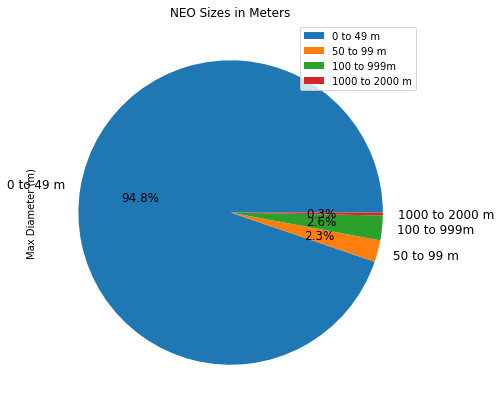

In [42]:

df_testing.groupby(['Diameter Grps']).count().plot(kind='pie', y='Max Diameter (m)', title = "NEO Sizes in Meters", figsize=(13, 7), autopct='%1.1f%%', fontsize=12)
